<a href="https://colab.research.google.com/github/pkehinde55/CIS_519/blob/main/hw2_ipynb_txt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CIS 4190/5190 Fall 2022 - Homework 2**


In [ ]:
import random
import numpy as np
import pandas as pd
import os
import sys
import matplotlib.pyplot as plt
from numpy.linalg import *
np.random.seed(42)  # don't change this line

In [ ]:
# For autogreader only, do not modify this cell.
# True for Google Colab, False for autograder
NOTEBOOK = (os.getenv('IS_AUTOGRADER') is None)
if NOTEBOOK:
    print("[INFO, OK] Google Colab.")
else:
    print("[INFO, OK] Autograder.")

[INFO, OK] Google Colab.


# **PennGrader Setup**

First, you'll need to set up the PennGrader, an autograder we are going to use throughout the semester. The PennGrader will automatically grade your answer and provide you with an instant feedback. Unless otherwise stated, you can resubmit up to a reasonable number of attempts (e.g. 100 attemptes per day). **We will only record your latest score in our backend database**.

After finishing each homework assignment, you must submit your iPython notebook to gradescope before the homework deadline. Gradescope will then retrive and display your scores from our backend database.

In [ ]:
%%capture
!pip3 install penngrader --upgrade

In [ ]:
from penngrader.grader import *

In [ ]:
#PLEASE ENSURE YOUR PENN-ID IS ENTERED CORRECTLY. IF NOT, THE AUTOGRADER WON'T KNOW WHO
#TO ASSIGN POINTS TO YOU IN OUR BACKEND
STUDENT_ID = 59331140        # YOUR PENN-ID GOES HERE AS AN INTEGER#

Run the following cell to initialize the autograder. This autograder will let you submit your code directly from this notebook and immidiately get a score.

**NOTE:** Remember we store your submissions and check against other student's submissions... so, not that you would, but no cheating.

In [ ]:
grader = PennGrader(homework_id = 'CIS_5190_Fall22_HW2', student_id = STUDENT_ID)

PennGrader initialized with Student ID: 59331140

Make sure this correct or we will not be able to store your grade


In [ ]:
# Serialization code needed by the autograder
import inspect, sys
from IPython.core.magics.code import extract_symbols

def new_getfile(object, _old_getfile=inspect.getfile):
    if not inspect.isclass(object):
        return _old_getfile(object)

    # Lookup by parent module (as in current inspect)
    if hasattr(object, '__module__'):
        object_ = sys.modules.get(object.__module__)
        if hasattr(object_, '__file__'):
            return object_.__file__

    # If parent module is __main__, lookup by methods (NEW)
    for name, member in inspect.getmembers(object):
        if inspect.isfunction(member) and object.__qualname__ + '.' + member.__name__ == member.__qualname__:
            return inspect.getfile(member)
    else:
        raise TypeError('Source for {!r} not found'.format(object))
inspect.getfile = new_getfile

def grader_serialize(obj):
    cell_code = "".join(inspect.linecache.getlines(new_getfile(obj)))
    class_code = extract_symbols(cell_code, obj.__name__)[0][0]
    return class_code

#### **NOTE 1. Results of sections marked as "manually graded" should be submitted along with the written homework solutions.**

#### **NOTE 2. If you are running into a `__builtins__' error, it's likely because you're using a function call of the form numpy.ndarray.mean(), like a.mean(). This does not play nice with PennGrader unfortunately. Please use the function call numpy.mean(a) instead.**

# **1. Linear Regression**

## **1.1. Linear Regression Implementation [15 pts, autograded]**

In this section you will implement linear regression with both L1 and L2 regularization. Your class LinearRegression must implement the following API:

* `__init__(alpha, tol, max_iter, theta_init, penalty, lambd)`
* `compute_cost(theta, X, y)`
* `compute_gradient(theta, X, y)`
* `fit(X, y)`
* `has_converged(theta_old, theta_new)`
* `predict(X)`

Note that these methods have already been defined correctly for you in the LinearRegression class. **DO NOT** change the API.

### **1.1.1. Cost Function [5 pts]**

The `compute_cost` function should compute the cost for a given $\theta$ vector. The cost is a scalar value given by:

$
\mathcal{L}({\theta}) = \frac{1}{N}\sum_{i =1}^N (h_{{\theta}}({x}_i) - y_i)^2
$

where

> $h_{{\theta}}({x}_i) = \theta^Tx_i$

Based on the regularisation penalty, you may need to add below regularisation penalty loss to MSE Loss computed previously.

L1 Regularisation Loss:
>$
\mathcal{L_1}({\theta}) = \mathcal{L}({\theta}) + \lambda\sum_{j = 1}^D  |{\theta}_j|
$

L2 Regularisation Loss:
>$
\mathcal{L_2}({\theta}) = \mathcal{L}({\theta}) + \lambda\sum_{j = 1}^D  {\theta}_j^2
$

$N$ is the number of training samples and $D$ is the number of features (excluding the intercept term). $\theta$ is a $D + 1$ dimensional vector, with the first element being the intercept term. Note that we do not include the intercept in the regularization terms.

---

### **1.1.2. Gradient of the Cost Function [5 pts]**

The `compute_gradient` function should compute the gradient of the cost function at a given $\theta$.

---

### **1.1.3. Convergence Check [1 pt]**

The `has_converged` function should return whether gradient descent algorithm has converged or not. Refer 1.1.4 for convergence condition.

---

### **1.1.4. Training [3 pts]**

The `fit` method should train the model via gradient descent, relying on the cost and gradient functions. The trained weights/coefficients must be stored as `theta_`. The weights and the corresponding cost after every gradient descent iteration must be stored in `hist_theta_` and `hist_cost_` respectively.

* The gradient descent stops or converges when $\theta$ stops changing or changes negligibly between consecutive iterations, i.e., when
$\| {\theta}_\mathit{new} -  {\theta}_\mathit{old} \|_2 \leq \epsilon$,
for some small $\epsilon$ (e.g., $\epsilon$ = 1E-4). $\epsilon$ is stored as `tol` (short for tolerance).

* To ensure that the function terminates, we should set a maximum limit for the number of gradient descent iterations irrespective of whether $\theta$ converges or not. The limit is stored as `max_iter`.

* `alpha` is the learning rate of the gradient descent algorithm.

---

### **1.1.5. Predict [1 pt]**

The `predict` function should predict the output for the data points in a given input data matrix.

In [ ]:
class LinearRegression:

    """
    Linear Regression

    Parameters
    ----------
    alpha: float, default=0.01
        Learning rate
    tol : float, default=0.0001
        Tolerance for stopping criteria
    max_iter : int, default=10000
        Maximum number of iterations of gradient descent
    theta_init: None (or) numpy.ndarray of shape (D + 1,)
        The initial weights; if None, all weights will be zero by default
    penalty : string, default = None
        The type of regularization. The other acceptable options are l1 and l2
    lambd : float, default = 1.0
        The parameter regularisation constant (i.e. lambda)

    Attributes
    ----------
    theta_ : numpy.ndarray of shape (D + 1,)
        The value of the coefficients after gradient descent has converged
        or the number of iterations hit the maximum limit
    hist_theta_ : numpy.ndarray of shape (num_iter, D + 1) where num_iter is the number of gradient descent iterations
        Stores theta_ after every gradient descent iteration
    hist_cost_ : numpy.ndarray of shape (num_iter,) where num_iter is the number of gradient descent iterations
        Stores cost after every gradient descent iteration
    """

    def __init__(self, alpha = 0.01, tol=1e-4, max_iter = 100, theta_init = None, penalty = None, lambd = 0):

        # store meta-data
        self.alpha = alpha
        self.theta_init = theta_init
        self.max_iter = max_iter
        self.tol = tol
        self.penalty = penalty
        self.lambd = lambd

        self.theta_ = None
        self.hist_cost_ = None
        self.hist_theta_ = None
    def compute_cost(self, theta, X, y):

        """
        Compute the cost/objective function.

        Parameters
        ----------
        theta: numpy.ndarray of shape (D + 1,)
            The coefficients
        X: numpy.ndarray of shape (N, D + 1)
            The features matrix
        y: numpy.ndarray of shape (N,)
            The target variable array

        Returns
        -------
        cost: float
            The cost as a scalar value
        """

        # TODO STARTS: Complete the function (should account for three cases - no penalty, l1 penalty, and l2 penalty)
        # filled predictions array using given predicting function
        predictions = np.zeros(y.size)

        # you can not jsut straight up get the absolute value of all the terms in theta becaause the theta array includes the intercept term which should not be regularized over

        predictions = [np.dot(np.transpose(theta), x_i) for x_i in X]
        mse = np.square(np.subtract(predictions, y)).mean()
        l1_penalty = 0
        l2_penalty = 0
        if self.penalty == "l1":
          l1_penalty = np.sqrt(np.dot(theta, theta) - theta[0]**2)* self.lambd

          #l1_penalty = self.lambd * (np.sum(abs_coef f))

        if self.penalty == "l2":
          l2_penalty  = (np.dot(theta, theta) - theta[0]**2)* self.lambd


        if self.penalty is None:
          return mse

        elif self.penalty == "l1":
          return mse + l1_penalty

        elif self.penalty == "l2":
          return mse + l2_penalty
         # print("l2")

        # TODO ENDS

    def compute_gradient(self, theta, X, y):

        """
        Compute the gradient of the cost function.

        Parameters
        ----------
        theta: numpy.ndarray of shape (D + 1,)
            The coefficients
        X: numpy.ndarray of shape (N, D + 1)
            The features matrix
        y: numpy.ndarray of shape (N,)
            The target variable array

        Returns
        -------
        gradient: numpy.ndarray of shape (D + 1,)
            The gradient values

        # TODO STARTS: Complete the function (should account for three cases - no penalty, l1 penalty, and l2 penalty)
        l2_grad = np.zeros(theta.size)
        l2_grad = [self.lambd * 2 * t_i for t_i in theta]
        #keep first component unchanged
        l2_grad[0] = 0
        #scale the rest of theta
        #for j in range(1, theta.size):
          #l2_grad[j] = self.lambd * 2 * theta[j]



        l1_grad = (theta / abs(theta)) * self.lambd;
        l1_grad[0] = 0;


        if self.penalty is None:
            return np.multiply( 2,np.multiply((-2/X.size) ,  np.dot(np.transpose(X), y)) + np.multiply((2/X.size) , np.dot(np.dot(np.transpose(X), X), theta)))
        elif self.penalty == "l2":
          return np.multiply( 2,np.multiply((-2/X.size) ,  np.dot(np.transpose(X), y)) + np.multiply((2/X.size) , np.dot(np.dot(np.transpose(X), X), theta))) + l2_grad
        elif self.penalty == "l1":
          return np.multiply( 2,np.multiply((-2/X.size) ,  np.dot(np.transpose(X), y)) + np.multiply((2/X.size) , np.dot(np.dot(np.transpose(X), X), theta))) + l1_grad

        """

        n, m = np.shape(X)
        grad = np.zeros(X[0].size)

        l2_grad = np.zeros(theta.size)
        l1_grad = np.zeros(theta.size)
        if self.penalty is "l2":
          l2_grad = [self.lambd * 2 * t_i for t_i in theta]
          l2_grad[0] = 0


        if self.penalty is "l1":
          l1_grad = (theta / abs(theta)) * self.lambd;
          l1_grad[0] = 0;
        for j in range(n):
          jth_X = X[j,:]
          jth_comp_Y = y[j]
          error = np.sum(jth_X * theta) - jth_comp_Y
          for k in range(m):
            grad[k] += error * X[j,k]

        return grad * (2 / n) + l1_grad + l2_grad






        # TODO ENDS

    def has_converged(self, theta_old, theta_new):

        """
        Return whether gradient descent has converged.

        Parameters
        ----------
        theta_old: numpy.ndarray of shape (D + 1,)
            The weights prior to the update by gradient descent
        theta_new: numpy.ndarray of shape (D + 1,)
            The weights after the update by gradient descent

        Returns
        -------
        converged: bool
            Whether gradient descent converged or not
        """

        # TODO START: Complete the function
        diff = np.zeros(theta_old.size)
        diff = abs(theta_new - theta_old)
        return np.max(diff) <= self.tol
        # TODO END

    def fit(self, X, y):


        """
        Compute the coefficients using gradient descent and store them as theta_.

        Parameters
        ----------
        X: numpy.ndarray of shape (N, D)
            The features matrix
        y: numpy.ndarray of shape (N,)
            The target variable array

        Returns
        -------
        Nothing
        """

        N, D = X.shape

        # Adding a column of ones at the beginning for the bias term
        ones_col = np.ones((N, 1))
        X = np.hstack((ones_col, X))

        # Initializing the weights
        if self.theta_init is None:
            theta_old = np.zeros((D + 1,))
        else:
            theta_old = self.theta_init

        # Initializing the historical weights matrix
        # Remember to append this matrix with the weights after every gradient descent iteration
        self.hist_theta_ = np.array([theta_old])

        # Computing the cost for the initial weights
        cost = self.compute_cost(theta_old, X, y)

        # Initializing the historical cost array
        # Remember to append this array with the cost after every gradient descent iteration
        self.hist_cost_ = np.array([cost])

        # TODO START: Complete the function
        for i in range(self.max_iter):
          gradient = self.compute_gradient(theta_old, X, y)
          cost = self.compute_cost(theta_old - self.alpha * gradient, X, y)
          self.hist_theta_ = np.vstack((self.hist_theta_, theta_old - self.alpha * gradient))
          self.hist_cost_ = np.append(self.hist_cost_, cost)
          if self.has_converged(theta_old, theta_old - self.alpha * gradient):
            break
          theta_old = theta_old - self.alpha * gradient
          self.theta_ = theta_old




        # TODO END

    def predict(self, X):

        """
        Predict the target variable values for the data points in X.

        Parameters
        ----------
        X: numpy.ndarray of shape (N, D)
            The features matrix

        Returns
        -------
        y_hat: numpy.ndarray of shape (N,)
            The predicted target *variables values for the data points in X
        """

        N = X.shape[0]
        X = np.hstack((np.ones((N, 1)), X))

        # TODO START: Complete the function
        final_prediction = np.zeros((N,))
        final_prediction = [np.sum(X[i,:] * self.theta_) for i in range(N)]
        return final_prediction
        # TODO END

In [ ]:
def test_lin_reg_compute_cost(StudentLinearRegression):

    test_case_theta = np.array([ 1.62434536, -0.61175641])
    test_case_X = np.array([[ 1.62434536, -0.61175641],
                            [-0.52817175, -1.07296862],
                            [ 0.86540763, -2.3015387 ],
                            [ 1.74481176, -0.7612069 ],
                            [ 0.3190391,  -0.24937038]])
    test_case_y = np.array([1, 1, 0, 0, 1])

    student_lr_reg = StudentLinearRegression()
    student_ans = student_lr_reg.compute_cost(test_case_theta, test_case_X, test_case_y)
    required_ans = 4.881828654157736

    assert np.abs(student_ans - required_ans) <= 1e-2

    student_lr_reg = StudentLinearRegression(penalty="l1", lambd=0.1)
    student_ans = student_lr_reg.compute_cost(test_case_theta, test_case_X, test_case_y)
    required_ans = 4.94300429515773

    assert np.abs(student_ans - required_ans) <= 1e-2

    student_lr_reg = StudentLinearRegression(penalty="l2", lambd=0.1)
    student_ans = student_lr_reg.compute_cost(test_case_theta, test_case_X, test_case_y)
    required_ans = 4.919253244675344
    assert np.abs(student_ans - required_ans) <= 1e-2

if NOTEBOOK:
    test_lin_reg_compute_cost(LinearRegression)

In [ ]:
# PennGrader Grading Cell
if NOTEBOOK:
    grader.grade(test_case_id = 'test_lin_reg_compute_cost', answer = LinearRegression)

Correct! You earned 5/5 points. You are a star!

Your submission has been successfully recorded in the gradebook.


In [ ]:
def test_lin_reg_compute_gradient(StudentLinearRegression):

    test_case_theta = np.array([ 1.62434536, -0.61175641])
    test_case_X = np.array([[ 1.62434536, -0.61175641],
                            [-0.52817175, -1.07296862],
                            [ 0.86540763, -2.3015387 ],
                            [ 1.74481176, -0.7612069 ],
                            [ 0.3190391,  -0.24937038]])
    test_case_y = np.array([1, 1, 0, 0, 1])

    student_lr_reg = StudentLinearRegression()
    student_ans = student_lr_reg.compute_gradient(test_case_theta, test_case_X, test_case_y)
    required_ans = [ 4.79663712, -3.53908485]
    print(student_ans)
    assert np.linalg.norm(student_ans - required_ans) <= 1e-2

    student_lr_reg = StudentLinearRegression(penalty="l1", lambd=0.1)
    student_ans = student_lr_reg.compute_gradient(test_case_theta, test_case_X, test_case_y)
    required_ans = [ 4.79663712, -3.63908485]
    print(student_ans)
    assert np.linalg.norm(student_ans - required_ans) <= 1e-2

    student_lr_reg = StudentLinearRegression(penalty="l2", lambd=0.1)
    student_ans = student_lr_reg.compute_gradient(test_case_theta, test_case_X, test_case_y)
    required_ans = [ 4.79663712, -3.66143613]
    print(student_ans)
    assert np.linalg.norm(student_ans - required_ans) <= 1e-2

if NOTEBOOK:
      test_lin_reg_compute_gradient(LinearRegression)

[ 4.79663712 -3.53908485]
[ 4.79663712 -3.63908485]
[ 4.79663712 -3.66143613]


In [ ]:
# PennGrader Grading Cell
if NOTEBOOK:
    grader.grade(test_case_id = 'test_lin_reg_compute_gradient', answer = LinearRegression)

Correct! You earned 5/5 points. You are a star!

Your submission has been successfully recorded in the gradebook.


In [ ]:
def test_lin_reg_has_converged(StudentLinearRegression):

    student_lr_reg = StudentLinearRegression()
    test_case_theta_old = np.array([ 1.62434536, -0.61175641])
    test_case_theta_new = np.array([1.624345, -0.611756])
    student_ans = student_lr_reg.has_converged(test_case_theta_old, test_case_theta_new)
    required_ans = True

    assert student_ans == required_ans

if NOTEBOOK:
    test_lin_reg_has_converged(LinearRegression)

In [ ]:
# PennGrader Grading Cell
if NOTEBOOK:
    grader.grade(test_case_id = 'test_lin_reg_has_converged', answer = LinearRegression)

Correct! You earned 1/1 points. You are a star!

Your submission has been successfully recorded in the gradebook.


In [ ]:
def test_lin_reg_fit(StudentLinearRegression):

    student_lr_reg = StudentLinearRegression(max_iter=5)
    test_case_X = np.array([[ 1.62434536, -0.61175641],
                            [-0.52817175, -1.07296862],
                            [ 0.86540763, -2.3015387 ],
                            [ 1.74481176, -0.7612069 ],
                            [ 0.3190391,  -0.24937038]])
    test_case_y = np.array([1, 1, 0, 0, 1])
    student_lr_reg.fit(test_case_X, test_case_y)
    student_ans = student_lr_reg.hist_theta_
    required_ans = np.array([[ 0.        ,  0.        ,  0.        ],
       [ 0.012     ,  0.00566085, -0.00773638],
       [ 0.02351422,  0.01085581, -0.01491529],
       [ 0.03457102,  0.01561393, -0.0215702 ],
       [ 0.04519706,  0.01996249, -0.02773259],
       [ 0.05541739,  0.02392713, -0.03343205]])
    #assert np.linalg.norm(student_ans - required_ans) <= 1e-2
    return student_ans



if NOTEBOOK:
    test_lin_reg_fit(LinearRegression)

In [ ]:
# PennGrader Grading Cell
if NOTEBOOK:
    grader.grade(test_case_id = 'test_lin_reg_fit', answer = grader_serialize(LinearRegression))

Correct! You earned 3/3 points. You are a star!

Your submission has been successfully recorded in the gradebook.


In [ ]:
def test_lin_reg_predict(StudentLinearRegression):

    student_lr_reg = StudentLinearRegression(max_iter=5)
    np.random.seed(1)
    test_case_X = np.random.randn(50, 2)
    test_case_y = np.random.randint(0, 2, 50)
    student_lr_reg.fit(test_case_X, test_case_y)
    student_ans = student_lr_reg.predict(test_case_X)
    required_ans = np.array([0.04739416, 0.02735934, 0.02140787, 0.04634383, 0.04320043,
       0.02836861, 0.03726417, 0.03808224, 0.03214353, 0.05166998,
       0.05102933, 0.05639199, 0.0416892 , 0.03175554, 0.04895695,
       0.03465034, 0.02912364, 0.03954521, 0.0396391 , 0.06440433,
       0.03189335, 0.06016748, 0.03661307, 0.07146111, 0.05261461,
       0.04180017, 0.03223834, 0.0500466 , 0.06128615, 0.05703506,
       0.05467262, 0.04388664, 0.04648138, 0.07052753, 0.04140456,
       0.02830984, 0.05608863, 0.0212115 , 0.05238969, 0.05514024,
       0.04020117, 0.05048966, 0.04696158, 0.04438422, 0.05897309,
       0.05443805, 0.03375689, 0.04794345, 0.04242038, 0.04869202])

    assert np.mean(np.abs(student_ans - required_ans)) <= 1e-2

if NOTEBOOK:
    test_lin_reg_predict(LinearRegression)

In [ ]:
# PennGrader Grading Cell
if NOTEBOOK:
    grader.grade(test_case_id = 'test_lin_reg_predict', answer = grader_serialize(LinearRegression))

Correct! You earned 1/1 points. You are a star!

Your submission has been successfully recorded in the gradebook.


## **1.2. Synthetic dataset [Ungraded]**

In this section we will first create some synthetic data on which we will run your linear regression implementation. We are creating 100 datapoints around the function y = mx + b, introducing Gaussian noise.

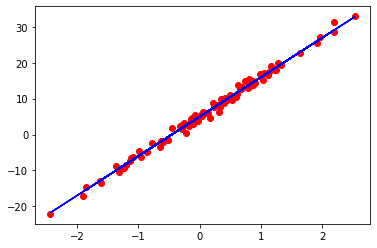

In [ ]:
# Don't modify this cell
if NOTEBOOK:
    num_samples = 100

    np.random.seed(1)
    noise = np.random.randn(num_samples, 1)
    X = np.random.randn(num_samples, 1)

    y_ideal = 11*X + 5
    y_real = (11*X + 5) + noise

    plt.plot(X, y_real, 'ro')
    plt.plot(X, y_ideal, 'b')

We see that this data is clearly regressable with a line, which, ideally, would be 11x + 5

Train a linear regression model using gradient descent, you should see that training loss goes down with the number of iterations and obtain a theta that converges to a value very close to [b, m], which in this case, for 11x + 5, would be theta = [5, 11]

Also, notice the effect of the type of regularisation on the theta obtained (after convergence) as well as the testing MSE loss. Do they make sense, given what was discussed in class?

 Theta: [ 5.00146733 10.99829705] 
 Norm of Theta: 12.082103020177945 
 Testing MSELoss: 3.2261290592292405e-06


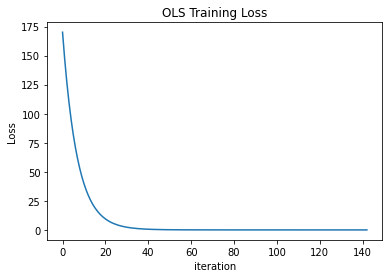

 Theta: [ 4.99974208 11.00819582] 
 Norm of Theta: 12.090400990311092 
 Testing MSELoss: 3.6290290141325665e-05


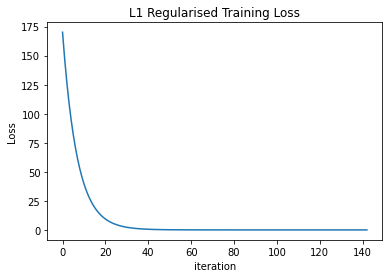

 Theta: [ 5.03874534 10.78469437] 
 Norm of Theta: 11.903721574412922 
 Testing MSELoss: 0.025096623669475075


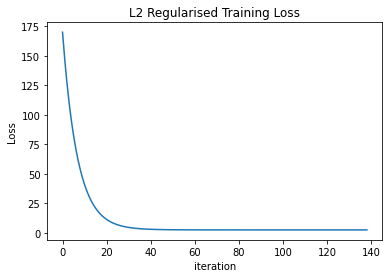

In [ ]:
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

def test_synthetic_data_sgd(X, y, n_iter = 2000, penalty=None, lambd=0):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=37)
  # Given that we want to get theta as the weights of the linear equation, we won't
  # standardize in this section

  alpha = 0.03  # Learning Rate

  # # Train the model
  lr_model = LinearRegression(alpha = alpha, tol=1e-4, max_iter = n_iter, penalty=penalty, lambd=lambd)
  lr_model.fit(X_train,y_train[:, 0])
  y_predict = lr_model.predict(X_test)
  loss = sklearn.metrics.mean_squared_error(y_predict, y_test)
  print(" Theta: {} \n Norm of Theta: {} \n Testing MSELoss: {}".format(lr_model.theta_, np.linalg.norm(lr_model.theta_, ord=2), loss))

  loss_history = lr_model.hist_cost_
  plt.plot(range(len(loss_history)), loss_history)
  plt.title("OLS Training Loss")
  plt.xlabel("iteration")
  plt.ylabel("Loss")
  if penalty == "l1":
    plt.title("L1 Regularised Training Loss")
  elif penalty == "l2":
    plt.title("L2 Regularised Training Loss")
  plt.show()

if NOTEBOOK:
    test_synthetic_data_sgd(X, y_ideal, 500)
    test_synthetic_data_sgd(X, y_ideal, 500, "l1", 0.02)
    test_synthetic_data_sgd(X, y_ideal, 500, "l2", 0.02)

## **1.3. Effect of polynomial degree on training and validation error [5 pts, manually graded] [optional for CIS 4190]**

Now, we consider a dataset that was generated using some higher degree polynomial function of the input variable. We do not know the degree of the underlying polynomial. Let us assume it to be an unknown value "p" and try to estimate it.

Polynomial regression hypothesis for one input variable  or feature (x) can be written as:
> $y = w_0 + w_1x + w_2x^2 + ... + w_px^p $

If you observe carefully, this can still be solved as a linear regression, where, instead of just 2 weights, we have p+1 weights, and the new features are higher order terms of the original feature. Using this idea, in this section, we will investigate how changing the assumed polynomial degree "p" in our model affects the training and validation error.

In [ ]:
if NOTEBOOK:

    if not os.path.exists("cis519_hw2_poly_reg.csv"):
        !gdown --id 1F5cGpc9ayxf49RQskiJFlL0v5LzCP7dn

    poly_reg_df = pd.read_csv('cis519_hw2_poly_reg.csv')

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1F5cGpc9ayxf49RQskiJFlL0v5LzCP7dn
To: /content/cis519_hw2_poly_reg.csv
100% 50.7k/50.7k [00:00<00:00, 59.1MB/s]


In [ ]:
import sklearn
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression as LinearRegressionSklearn
import numpy

def polynomial_regression(poly_reg_df, degrees):
    """
    Runs polynomial regression on the dataset 'poly_reg_df' for all the powers in 'degrees'
    """

    loss_train_list = []
    loss_test_list = []

    X_base = poly_reg_df.iloc[:, :-1].values
    y = poly_reg_df.iloc[:, -1].values

    sc= StandardScaler()



    for d in degrees:

        # TODO START: Complete the function:
        # 1. Transform the base feature X_base into its polynomial features of degree 'd' using PolynomialFeatures
        # Set include_bias to be False

        poly = PolynomialFeatures(d)
        poly.fit_transform(X_base)
        X =  X_base

        # 2. Preprocessing and splitting into train/test (70-30 ratio and random_state as 42)
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

        # 3. Scale X_train and X_test appropriately
        X_train = poly.fit_transform(X_train)
        X_test = poly.transform(X_test)

        # 4. Use scikit-learn's LinearRegression (imported as LinearRegressionSklearn for you) to
        # fit a linear model between the scaled version of X_train and y_train
        lr_model = LinearRegressionSklearn()
        lr_model.fit(X_train,y_train)


        # 5. Obtain predictions of the model on train and test data
        y_predict_test = lr_model.predict(X_test)
        y_predict_train = lr_model.predict(X_train)
        # 6. Compute the mean squared error and store it in loss_train and loss_test
        loss_train = sklearn.metrics.mean_squared_error(y_predict_train, y_train)
        loss_test = sklearn.metrics.mean_squared_error(y_predict_test, y_test)

        # 7. Append loss_train to loss_train_list and loss_test to loss_test_list
        loss_train_list = np.append(loss_train_list, [loss_train])
        loss_test_list = np.append(loss_test_list, [loss_test])

    return loss_train_list, loss_test_list
    # TODO END

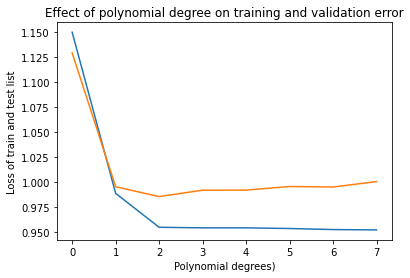

In [ ]:
if NOTEBOOK:

    degrees = np.arange(1, 9)

    loss_train_list, loss_test_list = polynomial_regression(poly_reg_df, degrees)

    # TODO START:
    # Plot the polynomial degrees (x-axis) against loss_train_list (y-axis) and loss_test_list (y-axis) in a single plot, with different colors.
    # Make sure to include x and y axis labels, legend as well as the title
    plt.xlabel('Polynomial degrees)')
    plt.ylabel('Loss of train and test list')
    plt.title("Effect of polynomial degree on training and validation error")
    plt.plot(range(len(loss_train_list)), loss_train_list)
    plt.plot(range(len(loss_test_list)), loss_test_list)
    plt.show()
    # TODO END

**Attach the plot to your written homework solutions. Describe the trends in the plot obtained. Briefly explain the reasoning behind why this would happen.**

# **2. Logistic Regression**

## **2.1. Logistic Regression Implementation [18 pts, autograded]**

Implement logistic regression with both L1 and L2 regularization by completing the LogisticRegression class.

Your class must implement the following API:

* `__init__(alpha, tol, max_iter, theta_init, penalty, lambd)`
* `sigmoid(x)`
* `compute_cost(theta, X, y)`
* `compute_gradient(theta, X, y)`
* `has_converged(theta_old, theta_new)`
* `fit(X, y)`
* `predict_proba(X)`
* `predict(X)`

Note that these methods have already been defined correctly for you in the LogisticRegression class. **DO NOT** change the API.

---

### **2.1.1. Sigmoid Function [1 pt]**

You should begin by implementing the `sigmoid` function.  As you may know, the sigmoid function $\sigma(x)$ is mathematically defined as follows.

> $\sigma(x) = \frac{1}{1\ +\ \text{exp}(-x)}$

**Be certain that your sigmoid function works with both vectors and matrices** --- for either a vector or a matrix, you function should perform the sigmoid function on every element.

---

### **2.1.2. Cost Function [5 pts]**

The `compute_cost` function should compute the cost for a given $\theta$ vector. The cost is a scalar value given by:

> $
\mathcal{L}({\theta}) = -\sum_{i =1}^N [ y_i\log(h_{{\theta}}({x}_i)) + (1 - y_i)\log(1 - h_{{\theta}}({x}_i))]
$

where
> $
h_{\theta}(x_{i}) = \sigma(\theta^{T}x_{i})
$


L1 Regularisation Loss:
>$
\mathcal{L1}({\theta}) = \mathcal{L}({\theta}) + \lambda \sum_{j = 1}^D  |{\theta}_j|
$

L2 Regularisation Loss:
>$
\mathcal{L2}({\theta}) = \mathcal{L}({\theta}) + \lambda \sum_{j = 1}^D  {\theta}_j^2
$

$N$ is the number of training samples and $D$ is the number of features (excluding the intercept term). $\theta$ is a $D + 1$ dimensional vector, with the first element being the intercept term. Note that we do not include the intercept in the regularization terms.

---

### **2.1.3. Gradient of the Cost Function [5 pts]**

The `compute_gradient` function should compute the gradient of the cost function at a given $\theta$.

---

### **2.1.4. Convergence Check [1 pt]**

The `has_converged` function should return whether gradient descent algorithm has converged or not. Refer 2.1.5 for convergence condition.

---

### **2.1.5. Training [3 pts]**

The `fit` method should train the model via gradient descent, relying on the cost and gradient functions. The trained weights/coefficients must be stored as `theta_`. The weights start as a zero vector. The weights and the corresponding cost after every gradient descent iteration must be stored in `hist_theta_` and `hist_cost_` respectively.

* The gradient descent stops or converges when $\theta$ stops changing or changes negligibly between consecutive iterations, i.e., when
$\| {\theta}_\mathit{new} -  {\theta}_\mathit{old} \|_2 \leq \epsilon$,
for some small $\epsilon$ (e.g., $\epsilon$ = 1E-4). $\epsilon$ is stored as `tol` (short for tolerance).

* To ensure that the function terminates, we should set a maximum limit for the number of gradient descent iterations irrespective of whether $\theta$ converges or not. The limit is stored as `max_iter`.

* `alpha` is the learning rate of the gradient descent algorithm.

---

### **2.1.6. Predict Probability [1 pt]**

The `predict_probability` function should predict the probabilities that the data points in a given input data matrix belong to class 1.

---

### **2.1.7. Predict [2 pts]**

The `predict` function should predict the classes of the data points in a given input data matrix.

In [ ]:
class LogisticRegression:

    """
    Logistic Regression (aka logit, MaxEnt) classifier.

    Parameters
    ----------
    alpha: float, default=0.01
        Learning rate
    tol : float, default=0.0001
        Tolerance for stopping criteria
    max_iter : int, default=10000
        Maximum number of iterations of gradient descent
    theta_init: None (or) numpy.ndarray of shape (D + 1,)
        The initial weights; if None, all weights will be zero by default
    penalty : string, default = None
        The type of regularization. The other acceptable options are l1 and l2
    lambd : float, default = 1.0
        The parameter regularisation constant (i.e. lambda)

    Attributes
    ----------
    theta_ : numpy.ndarray of shape (D + 1,)
        The value of the coefficients after gradient descent has converged
        or the number of iterations hit the maximum limit
    hist_theta_ : numpy.ndarray of shape (num_iter, D + 1) where num_iter is the number of gradient descent iterations
        Stores theta_ after every gradient descent iteration
    hist_cost_ : numpy.ndarray of shape (num_iter,) where num_iter is the number of gradient descent iterations
        Stores cost after every gradient descent iteration

    """

    def __init__(self, alpha=0.01, tol=0.0001, max_iter=10000, theta_init=None, penalty = None, lambd = 1.0):

        self.alpha = alpha
        self.tol = tol
        self.max_iter = max_iter
        self.theta_init = theta_init
        self.penalty = penalty
        self.lambd = lambd

        self.theta_ = None
        self.hist_cost_ = None
        self.hist_theta_ = None

    def sigmoid(self, x):

        """
        Compute the sigmoid value of the argument.

        Parameters
        ----------
        x: numpy.ndarray

        Returns
        -------
        out: numpy.ndarray
            The sigmoid value of x
        """

        # TODO START: Complete the function

        return 1 / (1 + np.exp(-x) )
        # TODO END

    def compute_cost(self, theta, X, y):

        """
        Compute the cost/objective function.

        Parameters
        ----------
        theta: numpy.ndarray of shape (D + 1,)
            The coefficients
        X: numpy.ndarray of shape (N, D + 1)
            The features matrix
        y: numpy.ndarray of shape (N,)
            The target variable array

        Returns
        -------
        cost: float
            The cost as a scalar value
        """

        # TODO START: Complete the function (should account for three cases - no penalty, l1 penalty, and l2 penalty)
        # DO NOT use np.dot for this function as it can possibly return nan. Use a combination of np.nansum and np.multiply.
        # Computes the cost function for all the training samples
        M = X.shape[0]
        Y = y.reshape(-1)



        cost = -(np.matmul(Y, np.log(self.sigmoid(np.matmul(X, theta)))) + np.matmul((1-Y), np.log(1-self.sigmoid(np.matmul(X, theta))))).sum()

        l1_penalty = 0
        l2_penalty = 0
        if self.penalty == "l1":
          l1_penalty = np.sqrt(np.dot(theta, theta) - theta[0]**2)* self.lambd

        #l1_penalty = self.lambd * (np.sum(abs_coef f))

        if self.penalty == "l2":
          l2_penalty  = (np.dot(theta, theta) - theta[0]**2)* self.lambd


        if self.penalty is None:
          return cost

        elif self.penalty == "l1":
          return cost + l1_penalty

        elif self.penalty == "l2":
          return cost + l2_penalty

        # TODO END

    def compute_gradient(self, theta, X, y):

        """
        Compute the gradient of the cost function.

        Parameters
        ----------
        theta: numpy.ndarray of shape (D + 1,)
            The coefficients
        X: numpy.ndarray of shape (N, D + 1)
            The features matrix
        y: numpy.ndarray of shape (N,)
            The target variable array

        Returns
        -------
        gradient: numpy.ndarray of shape (D + 1,)
            The gradient values
        """

        # TODO START: Complete the function (should account for three cases - no penalty, l1 penalty, and l2 penalty)

        l2_grad = np.zeros(theta.size)
        l1_grad = np.zeros(theta.size)

        if self.penalty == "l2":
          l2_grad = [2 * self.lambd * t_i for t_i in theta]
          l2_grad[0] = 0
        #keep first component unchanged
        if self.penalty == "l1":
          l1_grad = self.lambd*np.sign(theta)
          l1_grad[0] = 0;

        gradient = np.matmul(self.sigmoid(X.dot(theta)) - y, X)

        return gradient + l1_grad + l2_grad




        # TODO END

    def has_converged(self, theta_old, theta_new):

        """
        Return whether gradient descent has converged.

        Parameters
        ----------
        theta_old: numpy.ndarray of shape (D + 1,)
            The weights prior to the update by gradient descent
        theta_new: numpy.ndarray of shape (D + 1,)
            The weights after the update by gradient descent

        Returns
        -------
        converged: bool
            Whether gradient descent converged or not
        """

        # TODO START: Complete the function
        diff = np.zeros(theta_old.size)
        diff = abs(theta_new - theta_old)
        return np.max(diff) <= self.tol
        # TODO END

    def fit(self, X, y):

        """
        Compute the coefficients using gradient descent and store them as theta_.

        Parameters
        ----------
        X: numpy.ndarray of shape (N, D)
            The features matrix
        y: numpy.ndarray of shape (N,)
            The target variable array

        Returns
        -------
        Nothing
        """

        N, D = X.shape

        # Adding a column of ones at the beginning for the bias term
        ones_col = np.ones((N, 1))
        X = np.hstack((ones_col, X))

        # Initializing the weights
        if self.theta_init is None:
            theta_old = np.zeros((D + 1,))
        else:
            theta_old = self.theta_init

        print("THETA SHAPE")
        print(theta_old.shape)
        # Initializing the historical weights matrix
        # Remember to append this matrix with the weights after every gradient descent iteration
        self.hist_theta_ = np.array([theta_old])

        # Computing the cost for the initial weights
        cost = self.compute_cost(theta_old, X, y)

        # Initializing the historical cost array
        # Remember to append this array with the cost after every gradient descent iteration
        self.hist_cost_ = np.array([cost])

        # TODO START: Complete the function
        for i in range(0, self.max_iter):
          past_gradient = self.compute_gradient(theta_old, X, y)
          new_theta = theta_old - self.alpha * past_gradient
          self.hist_theta_ = np.vstack((self.hist_theta_, new_theta))
          new_cost = self.compute_cost(new_theta, X, y)
          converged = self.has_converged(theta_old, new_theta)
          theta_old = new_theta
          self.hist_cost_ = np.append(self.hist_cost_, new_cost)
          if converged:
            break
        self.theta_ = theta_old
        # TODO END

    def predict_proba(self, X):

        """
        Predict the probabilities that the data points in X belong to class 1.

        Parameters
        ----------
        X: numpy.ndarray of shape (N, D)
            The features matrix

        Returns
        -------
        y_hat: numpy.ndarray of shape (N,)
            The predicted probabilities that the data points in X belong to class 1
        """

        N = X.shape[0]
        X = np.hstack((np.ones((N, 1)), X))

        # TODO START: Complete the function
        return self.sigmoid(np.matmul(X, self.theta_))
        # TODO END

    def predict(self, X):

        """
        Predict the classes of the data points in X.

        Parameters
        ----------
        X: numpy.ndarray of shape (N, D)
            The features matrix

        Returns
        -------
        y_pred: numpy.ndarray of shape (N,)
            The predicted class of the data points in X
        """
        N = X.shape[0]

        # TODO START: Complete the function

        final_prediction = self.predict_proba(X)
        final_prediction[final_prediction < .5] = 0
        final_prediction[final_prediction >= .5] = 1


        return final_prediction
        # TODO END

In [ ]:
def test_log_reg_sigmoid(StudentLogisticRegression):

    student_lr_clf = StudentLogisticRegression()
    test_case = np.array([ 1.62434536, -0.61175641, -0.52817175, -1.07296862,  0.86540763])
    student_ans = student_lr_clf.sigmoid(test_case)
    required_ans = np.array([0.83539354, 0.35165864, 0.3709434 , 0.25483894, 0.70378922])

    assert np.linalg.norm(student_ans - required_ans) <= 1e-2

if NOTEBOOK:
    test_log_reg_sigmoid(LogisticRegression)

In [ ]:
# PennGrader Grading Cell
if NOTEBOOK:
    grader.grade(test_case_id = 'test_log_reg_sigmoid', answer = LogisticRegression)

Correct! You earned 1/1 points. You are a star!

Your submission has been successfully recorded in the gradebook.


In [ ]:
def test_log_reg_compute_cost(StudentLogisticRegression):

    test_case_theta = np.array([ 1.62434536, -0.61175641])
    test_case_X = np.array([[ 1.62434536, -0.61175641],
                            [-0.52817175, -1.07296862],
                            [ 0.86540763, -2.3015387 ],
                            [ 1.74481176, -0.7612069 ],
                            [ 0.3190391,  -0.24937038]])
    test_case_y = np.array([1, 1, 0, 0, 1])
    print(test_case_X.shape)
    print(test_case_y.shape)

    student_lr_clf = StudentLogisticRegression()
    student_ans = student_lr_clf.compute_cost(test_case_theta, test_case_X, test_case_y)
    required_ans = 7.467975765663204
    print(student_ans)
    assert np.abs(student_ans - required_ans) <= 1e-2

    student_lr_clf = StudentLogisticRegression(penalty="l1", lambd=0.1)
    student_ans = student_lr_clf.compute_cost(test_case_theta, test_case_X, test_case_y)
    required_ans = 7.52915138076548

    assert np.abs(student_ans - required_ans) <= 1e-2

    student_lr_clf = StudentLogisticRegression(penalty="l2", lambd=0.1)
    student_ans = student_lr_clf.compute_cost(test_case_theta, test_case_X, test_case_y)
    required_ans = 7.505400330283089
    assert np.abs(student_ans - required_ans) <= 1e-2

if NOTEBOOK:
    test_log_reg_compute_cost(LogisticRegression)

(5, 2)
(5,)
7.46797573976548


In [ ]:
# PennGrader Grading Cell
if NOTEBOOK:
    grader.grade(test_case_id = 'test_log_reg_compute_cost', answer = LogisticRegression)

Correct! You earned 5/5 points. You are a star!

Your submission has been successfully recorded in the gradebook.


In [ ]:
def test_log_reg_compute_gradient(StudentLogisticRegression):

    test_case_theta = np.array([ 1.62434536, -0.61175641])
    test_case_X = np.array([[ 1.62434536, -0.61175641],
                            [-0.52817175, -1.07296862],
                            [ 0.86540763, -2.3015387 ],
                            [ 1.74481176, -0.7612069 ],
                            [ 0.3190391,  -0.24937038]])
    test_case_y = np.array([1, 1, 0, 0, 1])

    student_lr_clf = StudentLogisticRegression()
    student_ans = student_lr_clf.compute_gradient(test_case_theta, test_case_X, test_case_y)
    required_ans = np.array([ 2.60573737, -2.20203139])

    assert np.linalg.norm(student_ans - required_ans) <= 1e-2

    student_lr_clf = StudentLogisticRegression(penalty="l1", lambd=0.1)
    student_ans = student_lr_clf.compute_gradient(test_case_theta, test_case_X, test_case_y)
    required_ans = np.array([ 2.60573737, -2.30203139])

    assert np.linalg.norm(student_ans - required_ans) <= 1e-2

    student_lr_clf = StudentLogisticRegression(penalty="l2", lambd=0.1)
    student_ans = student_lr_clf.compute_gradient(test_case_theta, test_case_X, test_case_y)
    required_ans = np.array([ 2.60573737, -2.32438267])

    assert np.linalg.norm(student_ans - required_ans) <= 1e-2

if NOTEBOOK:
    test_log_reg_compute_gradient(LogisticRegression)

In [ ]:
# PennGrader Grading Cell
if NOTEBOOK:
    grader.grade(test_case_id = 'test_log_reg_compute_gradient', answer = LogisticRegression)

Correct! You earned 5/5 points. You are a star!

Your submission has been successfully recorded in the gradebook.


In [ ]:
def test_log_reg_has_converged(StudentLogisticRegression):

    student_lr_clf = StudentLogisticRegression()
    test_case_theta_old = np.array([ 1.62434536, -0.61175641])
    test_case_theta_new = np.array([1.624345, -0.611756])
    student_ans = student_lr_clf.has_converged(test_case_theta_old, test_case_theta_new)
    required_ans = True

    assert student_ans == required_ans

if NOTEBOOK:
    test_log_reg_has_converged(LogisticRegression)

In [ ]:
# PennGrader Grading Cell
if NOTEBOOK:
    grader.grade(test_case_id = 'test_log_reg_has_converged', answer = LogisticRegression)

Correct! You earned 1/1 points. You are a star!

Your submission has been successfully recorded in the gradebook.


In [ ]:
def test_log_reg_fit(StudentLogisticRegression):

    student_lr_clf = StudentLogisticRegression(max_iter=5)
    test_case_X = np.array([[ 1.62434536, -0.61175641],
                            [-0.52817175, -1.07296862],
                            [ 0.86540763, -2.3015387 ],
                            [ 1.74481176, -0.7612069 ],
                            [ 0.3190391,  -0.24937038]])
    test_case_y = np.array([1, 1, 0, 0, 1])
    student_lr_clf.fit(test_case_X, test_case_y)
    student_ans = student_lr_clf.hist_theta_
    required_ans = np.array([[ 0.        ,  0.        ,  0.        ],
                             [ 0.005     , -0.00597503,  0.00564325],
                             [ 0.01006813, -0.01184464,  0.0111865 ],
                             [ 0.01520121, -0.01761226,  0.01663348],
                             [ 0.02039621, -0.02328121,  0.02198778],
                             [ 0.02565018, -0.0288547 ,  0.02725288]])

    assert np.linalg.norm(student_ans - required_ans) <= 1e-2

if NOTEBOOK:
    test_log_reg_fit(LogisticRegression)

THETA SHAPE
(3,)


In [ ]:
# PennGrader Grading Cell
if NOTEBOOK:
    grader.grade(test_case_id = 'test_log_reg_fit', answer = grader_serialize(LogisticRegression))

Correct! You earned 3/3 points. You are a star!

Your submission has been successfully recorded in the gradebook.


In [ ]:
def test_log_reg_predict_proba(StudentLogisticRegression):

    student_lr_clf = StudentLogisticRegression(max_iter=5)
    test_case_X = np.array([[ 1.62434536, -0.61175641],
                            [-0.52817175, -1.07296862],
                            [ 0.86540763, -2.3015387 ],
                            [ 1.74481176, -0.7612069 ],
                            [ 0.3190391,  -0.24937038]])
    test_case_y = np.array([1, 1, 0, 0, 1])
    student_lr_clf.fit(test_case_X, test_case_y)
    student_ans = student_lr_clf.predict_proba(test_case_X)
    required_ans = np.array([0.49052814, 0.5029122 , 0.48449386, 0.48864172, 0.50241207])

    assert np.linalg.norm(student_ans - required_ans) <= 1e-2

if NOTEBOOK:
    test_log_reg_predict_proba(LogisticRegression)

In [ ]:
# PennGrader Grading Cell
if NOTEBOOK:
    grader.grade(test_case_id = 'test_log_reg_predict_proba', answer = grader_serialize(LogisticRegression))

Correct! You earned 1/1 points. You are a star!

Your submission has been successfully recorded in the gradebook.


In [ ]:
def test_log_reg_predict(StudentLogisticRegression):

    student_lr_clf = StudentLogisticRegression(max_iter=5)
    np.random.seed(1)
    test_case_X = np.random.randn(50, 2)
    test_case_y = np.random.randint(0, 2, 50)
    student_lr_clf.fit(test_case_X, test_case_y)
    student_ans = student_lr_clf.predict(test_case_X)
    required_ans = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
                             0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1])

    assert np.mean(np.abs(student_ans - required_ans)) <= 0.02

if NOTEBOOK:
    test_log_reg_predict(LogisticRegression)

In [ ]:
# PennGrader Grading Cell
if NOTEBOOK:
    grader.grade(test_case_id = 'test_log_reg_predict', answer = grader_serialize(LogisticRegression))

Correct! You earned 2/2 points. You are a star!

Your submission has been successfully recorded in the gradebook.


## **2.2. Effect of learning rate on gradient descent [5 pts, manually graded]**



Run the below cell to download the dataset.

In [ ]:
if NOTEBOOK:

    if not os.path.exists("cis519_hw2_admit.csv"):
        !gdown --id 1CSD1vA9qZucuevxCuaOwr91tBaZcjNNh

    train_df = pd.read_csv("cis519_hw2_admit.csv")

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1CSD1vA9qZucuevxCuaOwr91tBaZcjNNh
To: /content/cis519_hw2_admit.csv
100% 3.61k/3.61k [00:00<00:00, 5.72MB/s]


The dataset contains two features - scores in two exams and the target variable is whether the student was admitted into a college or not. Your task for this question is to use this dataset and plot the variation of cost function with respect to the number of gradient descent iterations for different learning rates. Perform the following steps.

1. Scale the features using StandardScaler
2. For each of the learning rates - {0.001, 0.01, 0.1, 0.25}, fit a logistic regression model to the scaled data by running a maximum of 100 iterations of gradient descent with L2 penalty and $\lambda$ as 0.001.
3. Show the variation of the cost (stored in `hist_cost_`) with respect to the number of iterations for all the learning rates in the same plot.

Submit the plot along with the written homework solutions. The plot should have an appropriate title, axes labels, and legend. Briefly comment on the effect of increasing learning rate and what would be the best learning rate among the four values based on the plot.

(100, 2)
(100,)
THETA SHAPE
(3,)
THETA SHAPE
(3,)
THETA SHAPE
(3,)
THETA SHAPE
(3,)
[69.31471806         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         inf         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan    

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:92: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:92: RuntimeWarning: invalid value encountered in matmul
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:63: RuntimeWarning: overflow encountered in exp


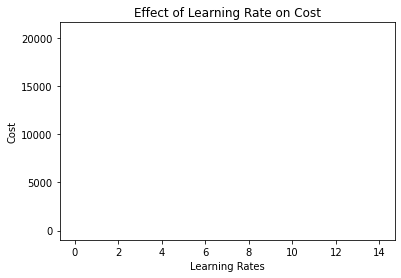

In [ ]:
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from matplotlib.figure import Figure

if NOTEBOOK:
    # STUDENT CODE STARTS:
    student_lr_clf = LogisticRegression(max_iter=100, penalty = "l2" , lambd = 0.001)
    X = pd.DataFrame(train_df.iloc[:, 0:2]).values
    Y = pd.DataFrame(train_df.loc[:, ['Admit']]).values
    Y = Y[:,0]
    #print(X)
    #print(Y)
    print(X.shape)
    print(Y.shape)
    student_lr_clf.fit(X,Y)
    cost_history_1 = student_lr_clf.hist_cost_
    student_lr_clf = LogisticRegression(max_iter=100, penalty = "l2" , lambd = 0.01)
    student_lr_clf.fit(X,Y)
    cost_history_2 = student_lr_clf.hist_cost_
    student_lr_clf = LogisticRegression(max_iter=100, penalty = "l2" , lambd = 0.1)
    student_lr_clf.fit(X,Y)
    cost_history_3 = student_lr_clf.hist_cost_
    student_lr_clf = LogisticRegression(max_iter=100, penalty = "l2" , lambd = 0.25)
    student_lr_clf.fit(X,Y)
    cost_history_4 = student_lr_clf.hist_cost_
    print(cost_history_1)
    plt.xlabel('Learning Rates')

    plt.ylabel('Cost')
    plt.title("Effect of Learning Rate on Cost")
    plt.plot(range(len(cost_history_1)), cost_history_1)
    plt.plot(range(len(cost_history_2)), cost_history_2)
    plt.plot(range(len(cost_history_3)), cost_history_3)
    plt.plot(range(len(cost_history_4)), cost_history_4)
    plt.show()











    # STUDENT CODE ENDS

Download the .ipynb notebook and submit on Gradescope.